In [90]:
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sn

In [22]:
## Load tables into Python
customers=pd.read_csv("customers.csv")
orders_items=pd.read_csv("orders_items.csv")
orders=pd.read_csv("orders.csv")
products=pd.read_csv("products.csv")
products_skus=pd.read_csv("products_skus.csv")
traffic=pd.read_csv("traffic.csv")
transactions=pd.read_csv("transactions.csv")

In [23]:
## Getting information of every table
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44661 entries, 0 to 44660
Data columns (total 3 columns):
id            44661 non-null int64
full_name     33699 non-null object
created_at    44661 non-null object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [24]:
orders_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36826 entries, 0 to 36825
Data columns (total 10 columns):
id                    36826 non-null int64
order_id              36826 non-null int64
product_id            36802 non-null float64
product_style         36826 non-null object
variant_id            36826 non-null int64
sku                   36826 non-null object
product_title         36826 non-null object
fulfillment_status    35257 non-null object
price                 36826 non-null float64
quantity              36826 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 2.8+ MB


In [25]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21358 entries, 0 to 21357
Data columns (total 13 columns):
id                        21358 non-null int64
created_at                21358 non-null object
closed_at                 20195 non-null object
cancelled_at              410 non-null object
customer_id               21358 non-null int64
financial_status          21358 non-null object
fulfillment_status        20680 non-null object
processed_at              21358 non-null object
total_price               21358 non-null float64
shipping_rate             21358 non-null float64
subtotal_price            21358 non-null float64
total_discounts           21358 non-null float64
total_line_items_price    21358 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 2.1+ MB


In [26]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
id              247 non-null int64
title           247 non-null object
product_type    242 non-null object
created_at      247 non-null object
published_at    223 non-null object
dtypes: int64(1), object(4)
memory usage: 9.7+ KB


In [27]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 8 columns):
index                    579 non-null int64
date_day                 579 non-null object
page_views               579 non-null int64
sessions                 579 non-null int64
product_detail_views     579 non-null int64
product_checkouts        579 non-null int64
product_adds_to_carts    579 non-null int64
avg_session_in_s         579 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 36.3+ KB


In [28]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27563 entries, 0 to 27562
Data columns (total 8 columns):
order_id      27563 non-null int64
id            27563 non-null int64
parent_id     4877 non-null float64
amount        27563 non-null float64
error_code    1643 non-null object
kind          27563 non-null object
status        27563 non-null object
created_at    27563 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 1.7+ MB


In [29]:
products_skus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 6 columns):
id               1356 non-null int64
product_id       1356 non-null int64
product_style    1356 non-null object
sku              1356 non-null object
created_at       1356 non-null object
price            1356 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 63.6+ KB


In [40]:
## change data type to datetime
customers['created_at']=pd.to_datetime(customers['created_at'])
orders['created_at']=pd.to_datetime(orders['created_at'])
orders['cancelled_at']=pd.to_datetime(orders['cancelled_at'])
orders['closed_at']=pd.to_datetime(orders['closed_at'])
orders['processed_at']=pd.to_datetime(orders['processed_at'])
products['created_at']=pd.to_datetime(products['created_at'])
products['published_at']=pd.to_datetime(products['published_at'])
transactions['created_at']=pd.to_datetime(transactions['created_at'])
products_skus['created_at']=pd.to_datetime(products_skus['created_at'])
traffic['date_day']=pd.to_datetime(traffic['date_day'])

In [39]:
##Already know null value info from above check if there is any duplicate
print(orders[orders.duplicated()])
print(customers[customers.duplicated()])
print(orders_items[orders_items.duplicated()])
print(products[products.duplicated()])
print(traffic[traffic.duplicated()])
print(transactions[transactions.duplicated()])
print(products_skus[products_skus.duplicated()])

Empty DataFrame
Columns: [id, created_at, closed_at, cancelled_at, customer_id, financial_status, fulfillment_status, processed_at, total_price, shipping_rate, subtotal_price, total_discounts, total_line_items_price]
Index: []
Empty DataFrame
Columns: [id, full_name, created_at]
Index: []
Empty DataFrame
Columns: [id, order_id, product_id, product_style, variant_id, sku, product_title, fulfillment_status, price, quantity]
Index: []
Empty DataFrame
Columns: [id, title, product_type, created_at, published_at]
Index: []
Empty DataFrame
Columns: [index, date_day, page_views, sessions, product_detail_views, product_checkouts, product_adds_to_carts, avg_session_in_s]
Index: []
Empty DataFrame
Columns: [order_id, id, parent_id, amount, error_code, kind, status, created_at]
Index: []
Empty DataFrame
Columns: [id, product_id, product_style, sku, created_at, price]
Index: []


In [ ]:
## no duplicate at all

In [46]:
## Getting order numbers based on date
orders_per_day=orders.groupby('created_at').count()
orders_per_day.head(10)

,id,closed_at,cancelled_at,customer_id,financial_status,fulfillment_status,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
created_at,,,,,,,,,,,,
2016-08-21,1,1,1,1,1,0,1,1,1,1,1,1
2016-08-22,794,780,16,794,794,775,794,794,794,794,794,794
2016-08-23,183,179,4,183,183,180,183,183,183,183,183,183
2016-08-24,44,43,0,44,44,44,44,44,44,44,44,44
2016-08-25,62,61,3,62,62,54,62,62,62,62,62,62
2016-08-26,311,277,6,311,311,283,311,311,311,311,311,311
2016-08-27,57,54,0,57,57,55,57,57,57,57,57,57
2016-08-28,41,33,7,41,41,32,41,41,41,41,41,41
2016-08-29,19,18,1,19,19,18,19,19,19,19,19,19


In [49]:
orders_per_day=orders_per_day.rename(columns={'id':'order_number'})
orders_per_day=orders_per_day[['order_number']]

In [50]:
orders_per_day.head(10)

,order_number
created_at,
2016-08-21,1
2016-08-22,794
2016-08-23,183
2016-08-24,44
2016-08-25,62
2016-08-26,311
2016-08-27,57
2016-08-28,41
2016-08-29,19


In [43]:
traffic.head()

,index,date_day,page_views,sessions,product_detail_views,product_checkouts,product_adds_to_carts,avg_session_in_s
0,0,2016-08-17,204,6,0,0,0,2374.166667
1,1,2016-08-18,661,27,0,0,0,1632.111111
2,2,2016-08-19,241,12,0,0,0,1891.250000
3,3,2016-08-20,534,23,0,0,0,1557.956522
4,4,2016-08-21,10276,4946,0,0,0,73.470481


In [52]:
## Combine traffic table and order based on date
traffic_order=pd.merge(orders_per_day,traffic,left_on='created_at',right_on='date_day')

In [53]:
traffic_order.head(10)

,order_number,index,date_day,page_views,sessions,product_detail_views,product_checkouts,product_adds_to_carts,avg_session_in_s
0,1,4,2016-08-21,10276,4946,0,0,0,73.470481
1,794,5,2016-08-22,625003,146860,175257,5639,10851,142.407837
2,183,6,2016-08-23,220707,61654,58940,761,1817,106.161449
3,44,7,2016-08-24,93694,27182,24935,256,638,98.999669
4,62,8,2016-08-25,63927,15239,19167,901,1826,130.410854
5,311,9,2016-08-26,55625,14209,16618,443,1225,117.764586
6,57,10,2016-08-27,42933,11929,12505,224,672,105.980635
7,41,11,2016-08-28,27736,7651,8172,175,437,110.083388
8,19,12,2016-08-29,36569,10507,9810,149,422,104.446559
9,24,13,2016-08-30,24199,6933,6815,124,321,100.306072


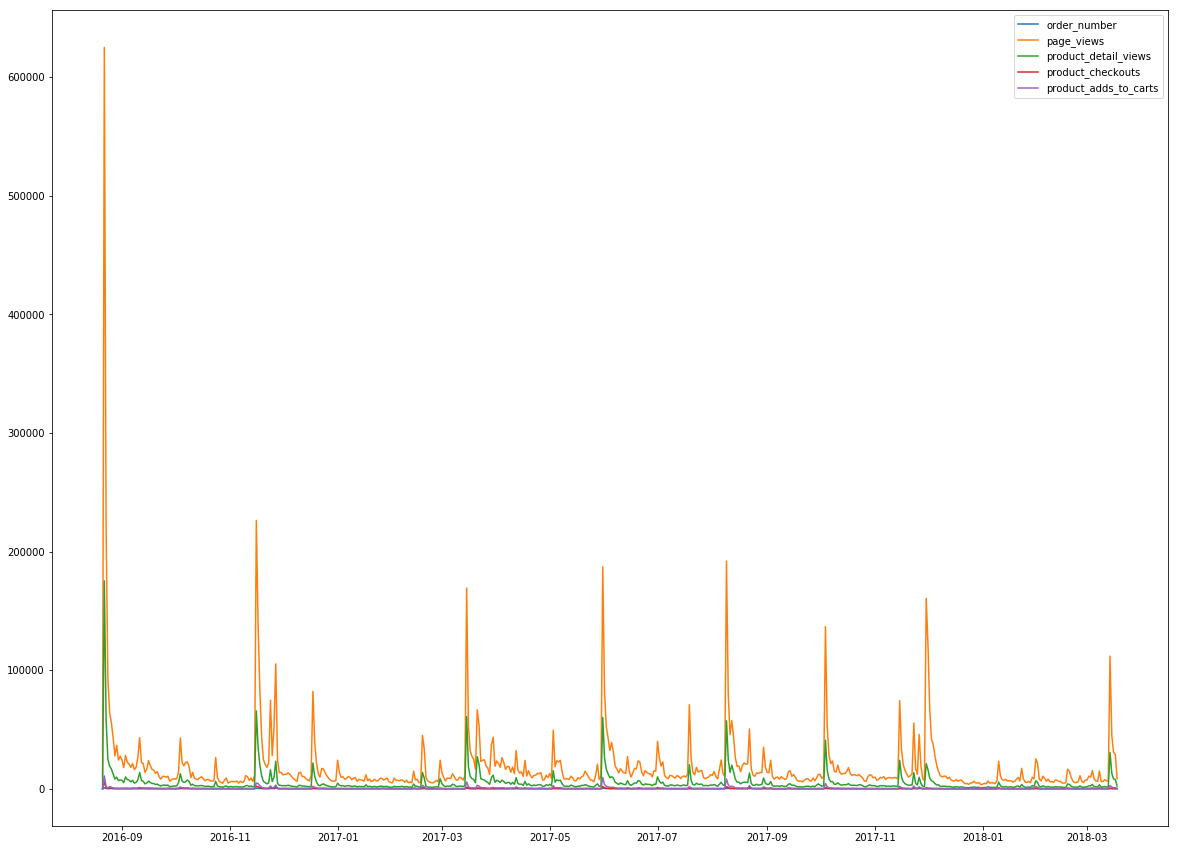

In [89]:
## Create plots for traffic information based on date
fig,ax=plt.subplots(figsize=(20,15))
plt.plot('date_day','order_number',data=traffic_order)
plt.plot('date_day','page_views',data=traffic_order)
plt.plot('date_day','product_detail_views',data=traffic_order)
plt.plot('date_day','product_checkouts',data=traffic_order)
plt.plot('date_day','product_adds_to_carts',data=traffic_order)
plt.legend()

In [98]:
##order numberis too small compared to page views, but it seems like these numbers decrease or increase at the same time

In [95]:
## Create correlation table for orders and traffic info
traffic_order_corr=traffic_order[['order_number','product_detail_views','product_adds_to_carts','page_views']].corr()

In [96]:
traffic_order_corr

,order_number,product_detail_views,product_adds_to_carts,page_views
order_number,1.000000,0.833727,0.853161,0.818447
product_detail_views,0.833727,1.000000,0.898455,0.984876
product_adds_to_carts,0.853161,0.898455,1.000000,0.863625
page_views,0.818447,0.984876,0.863625,1.000000


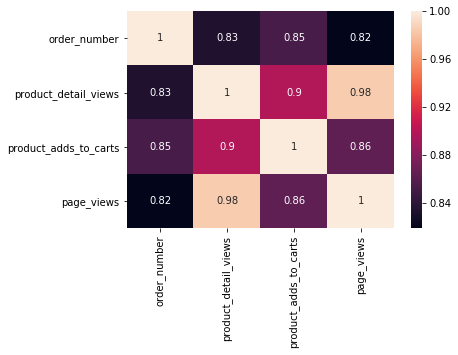

In [97]:
sn.heatmap(traffic_order_corr, annot=True)
plt.show()

In [99]:
## From the correkation martix and heatmap, we can tell that order number,product_detail_views, product_adds_to_carts and 
## page_views all have strong positive correlation with each other

In [127]:
##Question 2
order_detail=pd.merge(orders_items,orders,how="inner",left_on="order_id",right_on="id")

In [128]:
order_detail.head()

,id_x,order_id,product_id,product_style,variant_id,sku,product_title,fulfillment_status_x,price,quantity,...,cancelled_at,customer_id,financial_status,fulfillment_status_y,processed_at,total_price,shipping_rate,subtotal_price,total_discounts,total_line_items_price
0,13325125855,7675398239,1.292763e+10,2c259a42d38f5f097274beff811168e2,50547057311,000d96b3b77b33af530eec77689bd210,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,...,2016-08-22,8683754719,voided,NaN,2016-08-21,44.57,6.33,35.0,0.0,35.0
1,13327045983,7676331935,1.292763e+10,dd804c4025d230467823200aa82e9219,50547118303,e26c77e84b91c9939c23c3e3ef66475a,0e6e45ad42707e9732119f4b98aec7ce,NaN,79.0,1,...,NaT,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0
2,13327046047,7676331935,1.292763e+10,2c259a42d38f5f097274beff811168e2,50547057503,f2931943ec7d3533f6db588118623710,5cfd6c4e00b25e6dec5538928206b7b8,NaN,35.0,1,...,NaT,8686224991,refunded,NaN,2016-08-22,124.55,0.00,114.0,0.0,114.0
3,13327109727,7676363167,1.292806e+10,f4e2e3c5433e4120889e2a7e0e0180a8,50553858975,0be0c8bf78ecf36416a40c9012acd19e,bede8c8f4e3c9c9d9a061d9a8d086cdc,NaN,58.0,1,...,2016-08-22,8686224991,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0
4,13327109791,7676363167,1.292763e+10,08ba660ec5643520a73108bef6f3ddd6,50547002591,c5b63ade8eba850c6b2f0c85a4757cec,27d598cb953eff3667f7d051fe795284,NaN,25.0,1,...,2016-08-22,8686224991,voided,NaN,2016-08-22,97.68,7.00,83.0,0.0,83.0


In [130]:
order_detail=order_detail[['order_id','product_title','created_at','price','quantity']]
order_detail.head(10)

,order_id,product_title,created_at,price,quantity
0,7675398239,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-21,35.0,1
1,7676331935,0e6e45ad42707e9732119f4b98aec7ce,2016-08-22,79.0,1
2,7676331935,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1
3,7676363167,bede8c8f4e3c9c9d9a061d9a8d086cdc,2016-08-22,58.0,1
4,7676363167,27d598cb953eff3667f7d051fe795284,2016-08-22,25.0,1
5,7676539359,27d598cb953eff3667f7d051fe795284,2016-08-22,25.0,1
6,7676539359,07dd8ba2ccadf3f3766750f10f6d05b5,2016-08-22,25.0,1
7,7676539359,d57bc87aca919b4758da6974cdf607fa,2016-08-22,45.0,1
8,7676539359,27d598cb953eff3667f7d051fe795284,2016-08-22,25.0,1
9,7676549855,07dd8ba2ccadf3f3766750f10f6d05b5,2016-08-22,25.0,1


In [131]:
##connect order detail table with products table to get product category info
order_products_detail=pd.merge(order_detail,products,how="inner",left_on="product_title",right_on="title")

In [132]:
order_products_detail.head(20)

,order_id,product_title,created_at_x,price,quantity,id,title,product_type,created_at_y,published_at
0,7675398239,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-21,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
1,7676331935,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
2,7676564127,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
3,7676620191,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
4,7676649887,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
5,7676658079,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
6,7676672351,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
7,7676711455,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
8,7676882847,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT
9,7676928287,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT


In [133]:
##devide time period to month
order_products_detail['month_year']=order_products_detail['created_at_x'].dt.to_period('M')

In [135]:
##caulate total sale amount based on quantity and price
order_products_detail['sale_amount']=order_products_detail['quantity']*order_products_detail['price']

In [136]:
## Calculate total sale amount based on product type
opd_gb=order_products_detail.groupby(['month_year','product_type']).agg('sum')['sale_amount']

In [146]:
df=opd_gb.unstack()

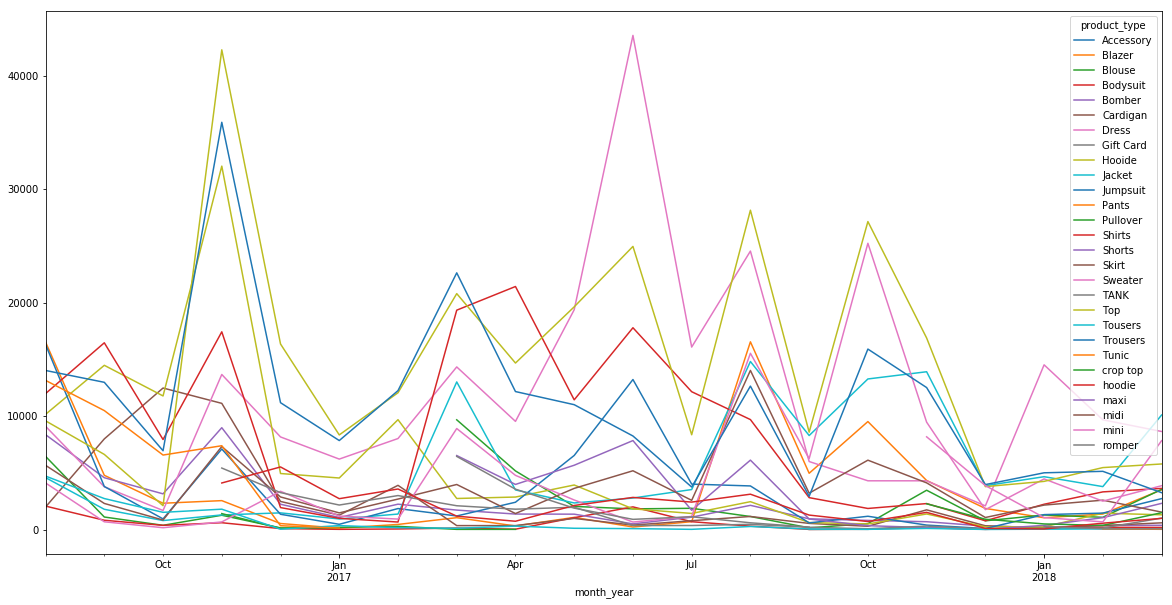

In [150]:
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(111)
df.plot(ax=ax)

In [158]:
order_products_detail.groupby('product_type').agg('sum')['sale_amount'].sort_values(ascending=False)

product_type
Top          286077.57
Dress        227833.09
Trousers     220523.40
Shirts       166405.30
Jacket       110313.13
Hooide       108813.30
Sweater       98551.20
Skirt         74988.72
Blazer        74019.20
Jumpsuit      71004.74
Cardigan      49468.95
Bomber        42681.96
Blouse        42223.40
Tunic         38272.50
Shorts        37197.60
hoodie        33743.83
TANK          22952.70
mini          21679.30
romper        16294.40
Tousers       12757.50
Bodysuit       9236.00
maxi           7400.00
crop top       5587.40
Pullover       2167.20
Pants          1920.00
midi           1600.00
Accessory       858.00
Gift Card        70.00
Name: sale_amount, dtype: float64

In [160]:
##Question 3
##Combine order_items and orders table to check if order contain discount
order_detail=pd.merge(orders_items,orders,how="inner",left_on="order_id",right_on="id")
order_detail=order_detail[['order_id','product_title','created_at','price','quantity','total_discounts']]

In [161]:
##calculate sale amount
order_detail['sale_amount']=order_detail['quantity']*order_detail['price']

In [167]:
## change data type
order_detail['total_discounts']=pd.to_numeric(order_detail['total_discounts'])

In [173]:
## create discount column for order_detail
discount=[]
for i in range(len(order_detail)):
    if order_detail['total_discounts'][i]>0:
        discount.append('YES')
    else:
        discount.append('No')

In [178]:
discount[-20:-1]

['YES',
 'YES',
 'YES',
 'No',
 'No',
 'No',
 'YES',
 'YES',
 'YES',
 'YES',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No']

In [180]:
order_detail['discount']=discount

In [184]:
##combine previous table  with product table to get product type info
order_detail=pd.merge(order_detail,products,how="inner",left_on="product_title",right_on="title")

In [206]:
##change period to month
order_detail['month_year']=order_detail['created_at_x'].dt.to_period('M')

In [207]:
order_detail

,order_id,product_title,created_at_x,price,quantity,total_discounts,sale_amount,discount,id,title,product_type,created_at_y,published_at,month_year
0,7675398239,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-21,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
1,7676331935,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
2,7676564127,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
3,7676620191,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
4,7676649887,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
5,7676658079,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
6,7676672351,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
7,7676711455,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
8,7676882847,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08
9,7676928287,5cfd6c4e00b25e6dec5538928206b7b8,2016-08-22,35.0,1,0.0,35.0,No,12927629215,5cfd6c4e00b25e6dec5538928206b7b8,Tunic,2016-08-18,NaT,2016-08


In [208]:
##calculate total sale amount based on discount, month and product type
discount_gb=order_detail.groupby(['discount','month_year','product_type']).agg('sum')['sale_amount']

In [215]:
df=discount_gb.unstack(level=[1,2]).transpose().reset_index()

In [216]:
df

discount,month_year,product_type,No,YES
0,2016-08,Blazer,16276.0,260.0
1,2016-08,Blouse,6346.0,116.0
2,2016-08,Bodysuit,2048.0,32.0
3,2016-08,Bomber,8374.0,NaN
4,2016-08,Cardigan,2001.0,NaN
5,2016-08,Dress,9002.0,110.0
6,2016-08,Hooide,10170.0,NaN
7,2016-08,Jacket,4526.0,62.0
8,2016-08,Jumpsuit,16184.0,136.0
9,2016-08,Shirts,12000.0,NaN


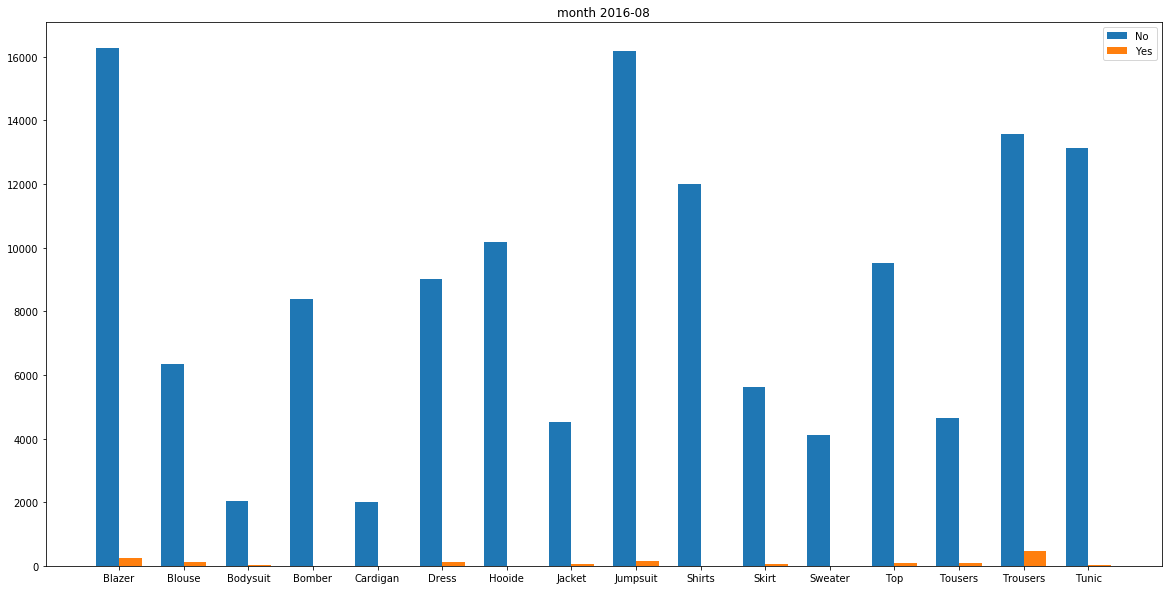

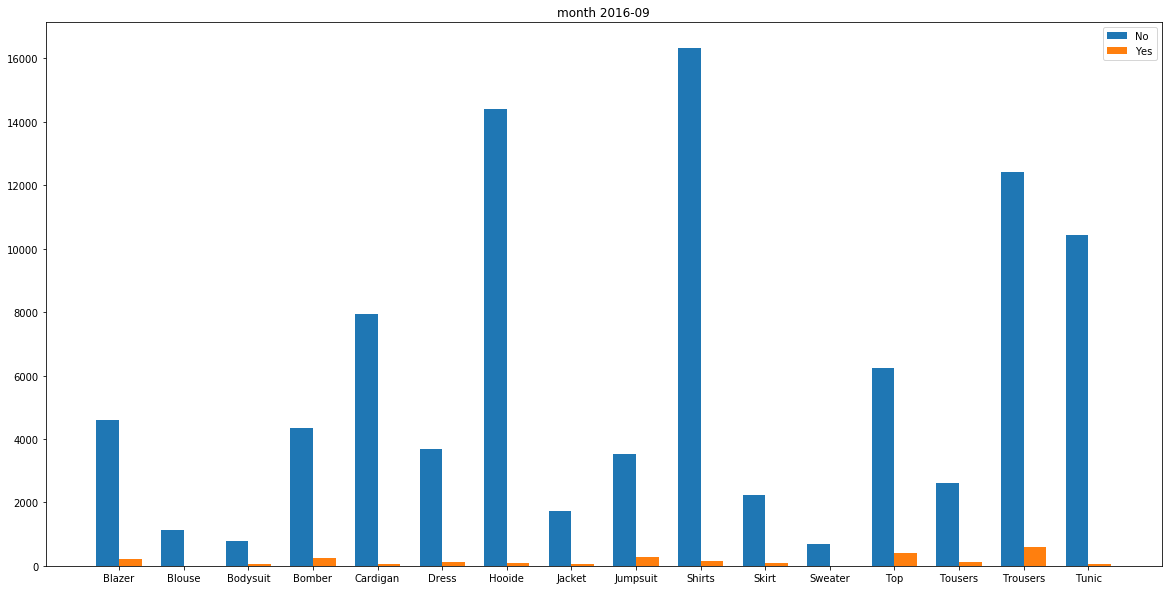

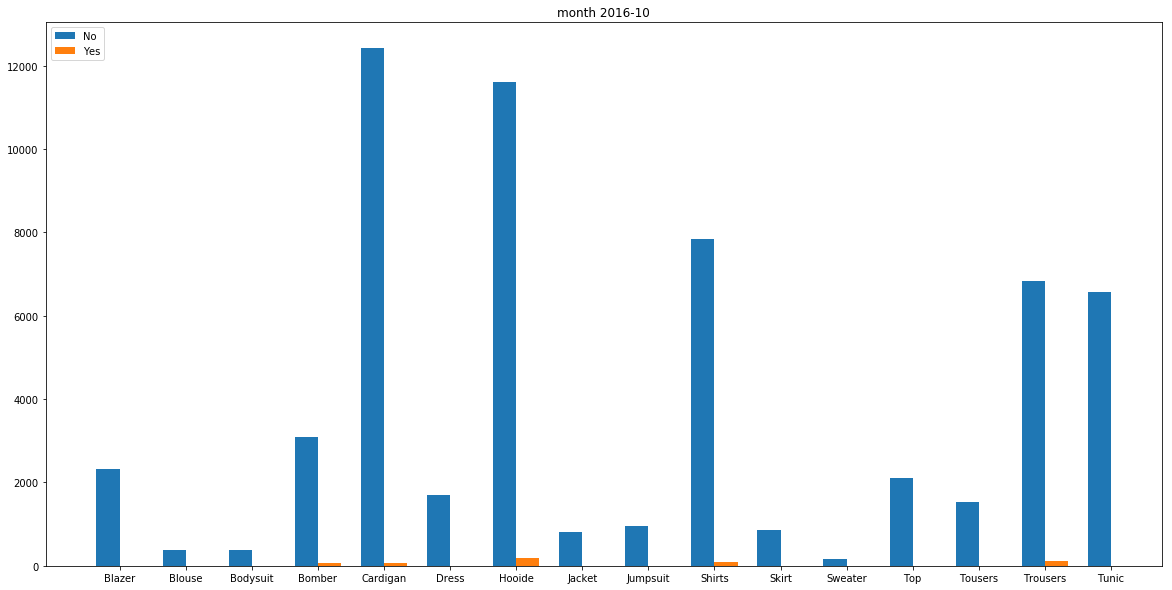

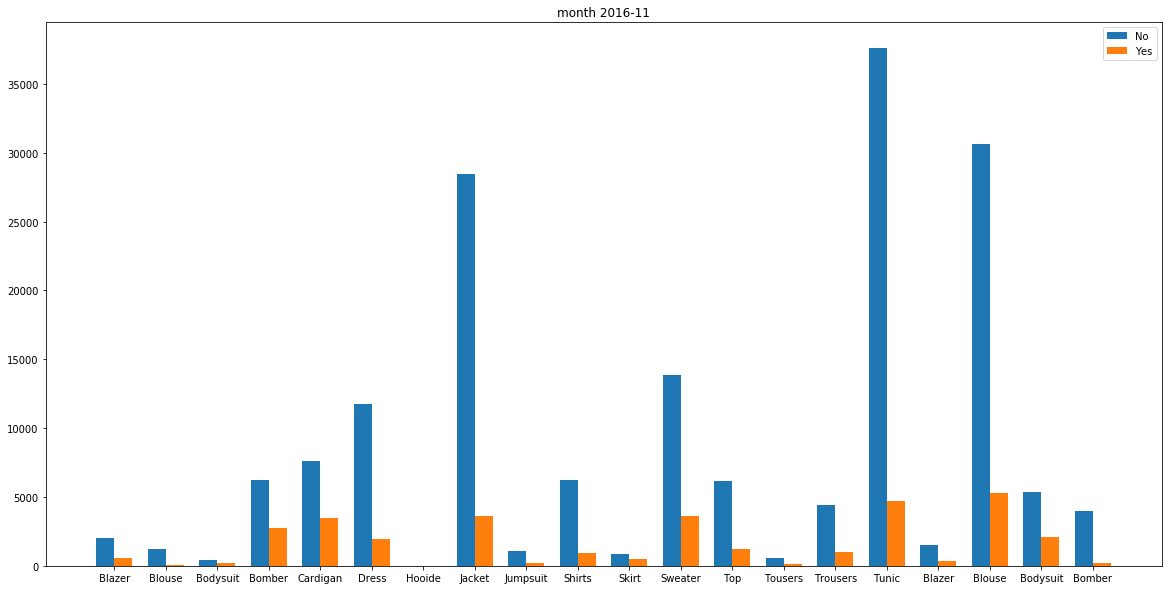

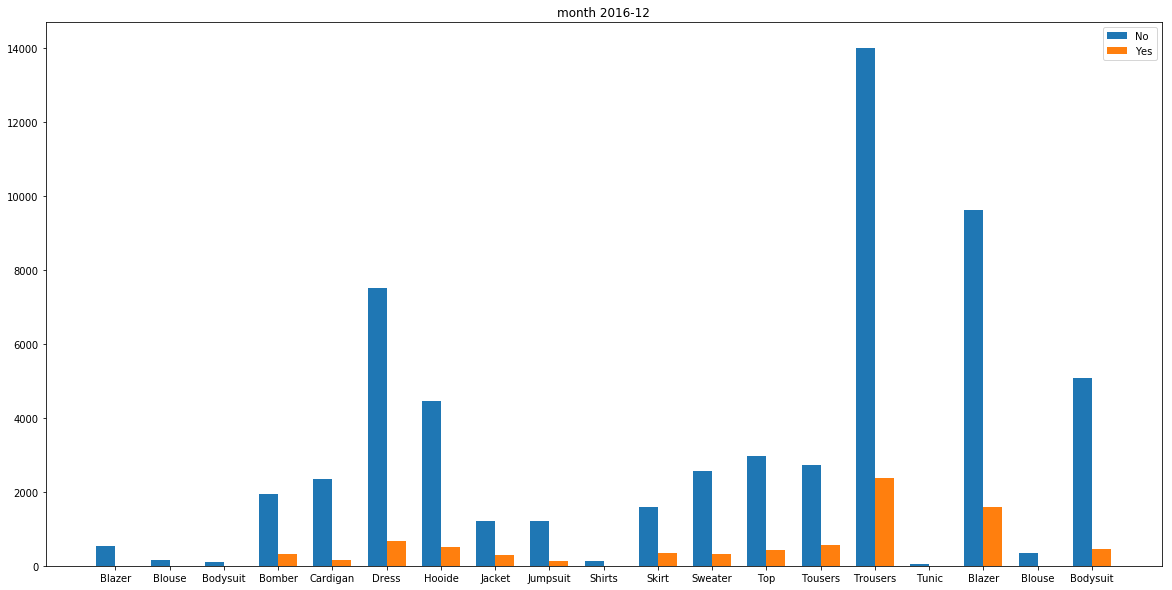

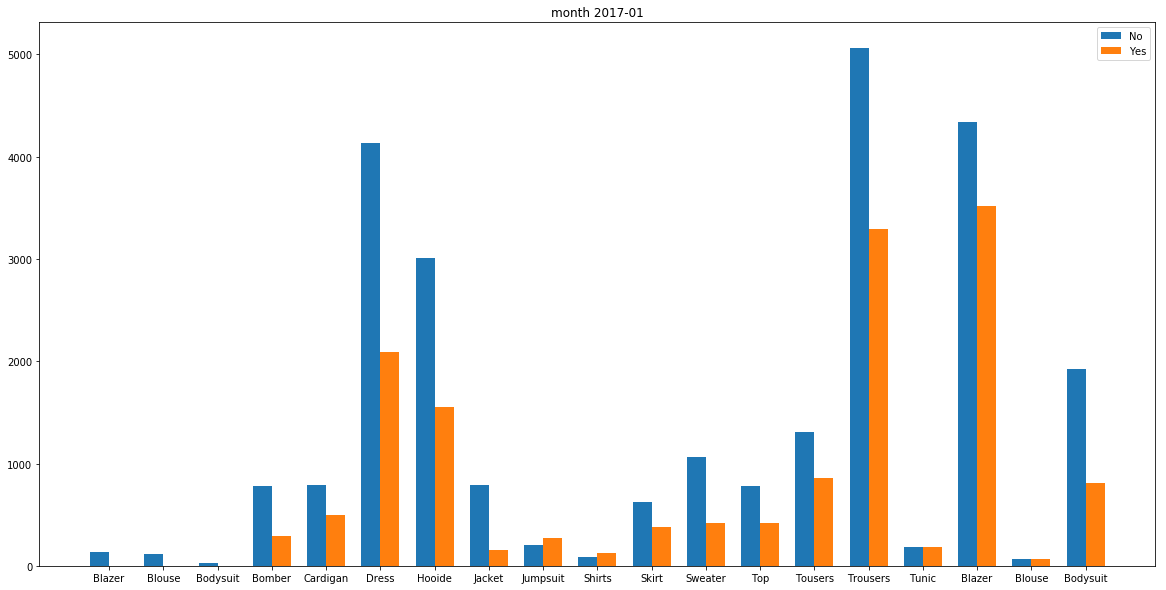

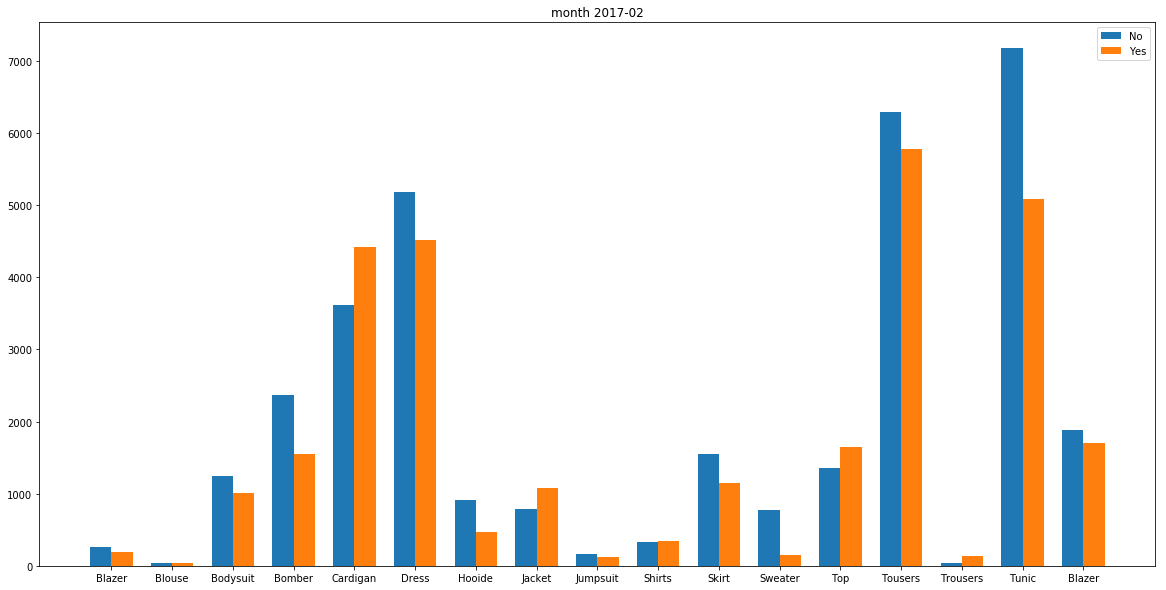

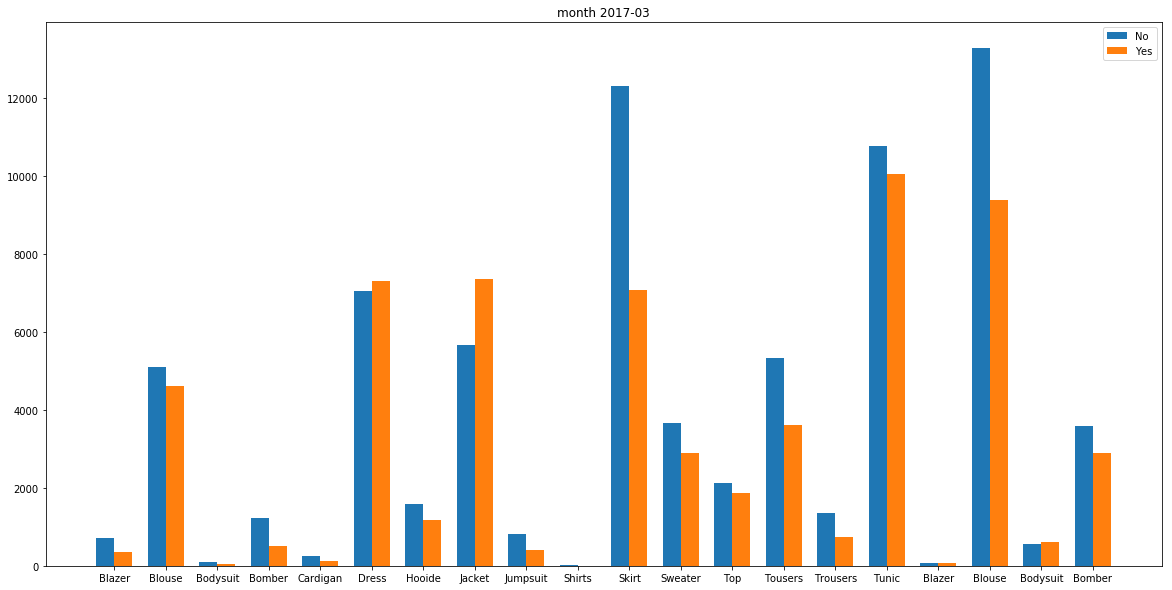

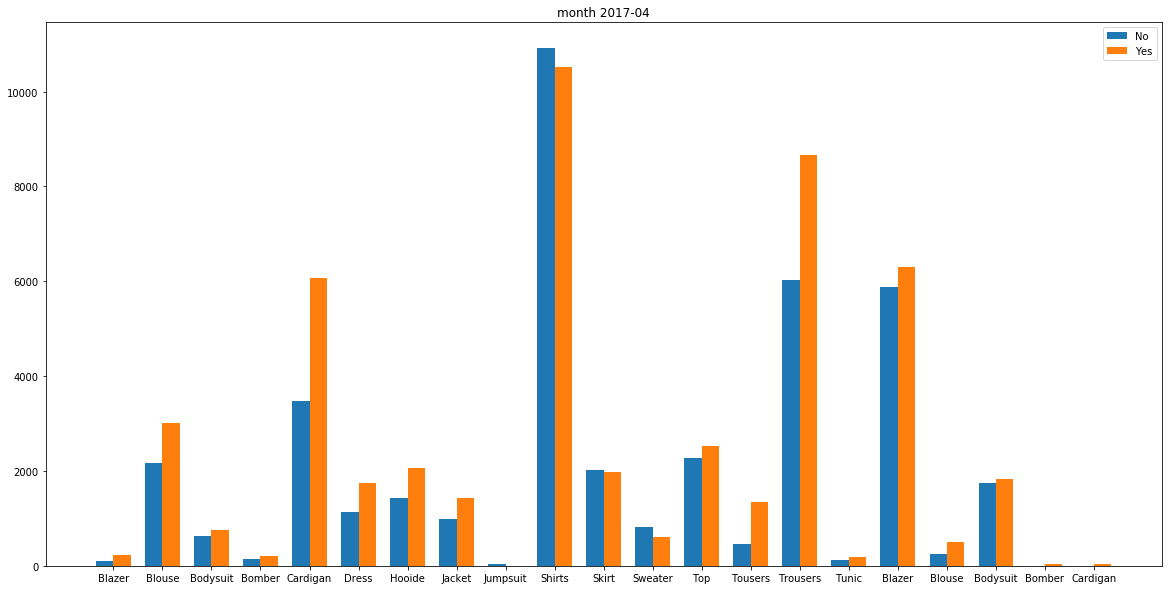

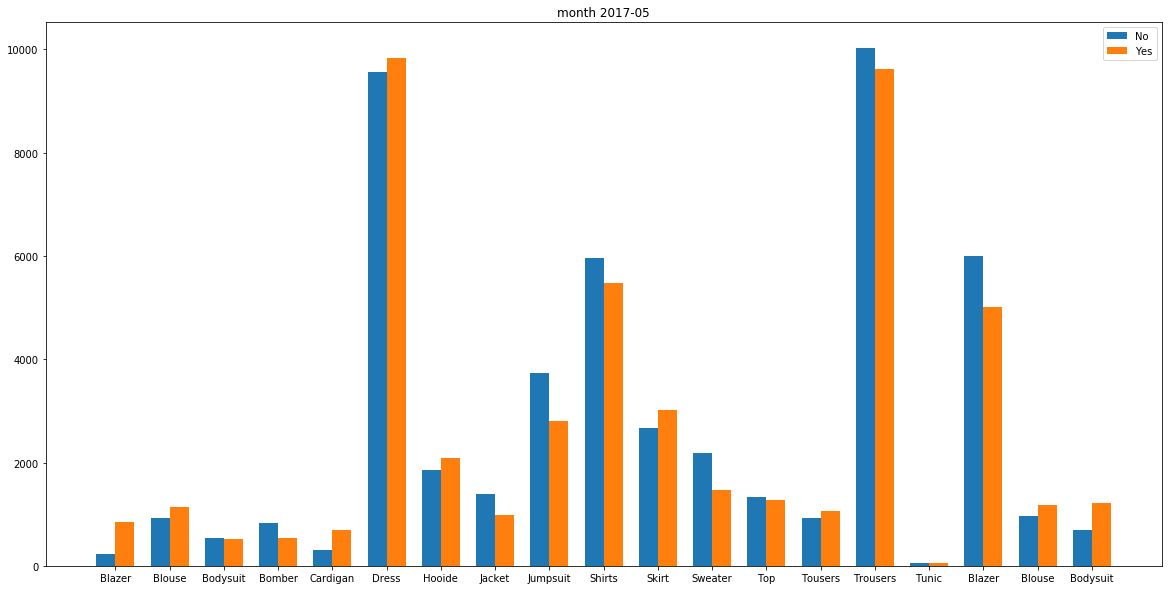

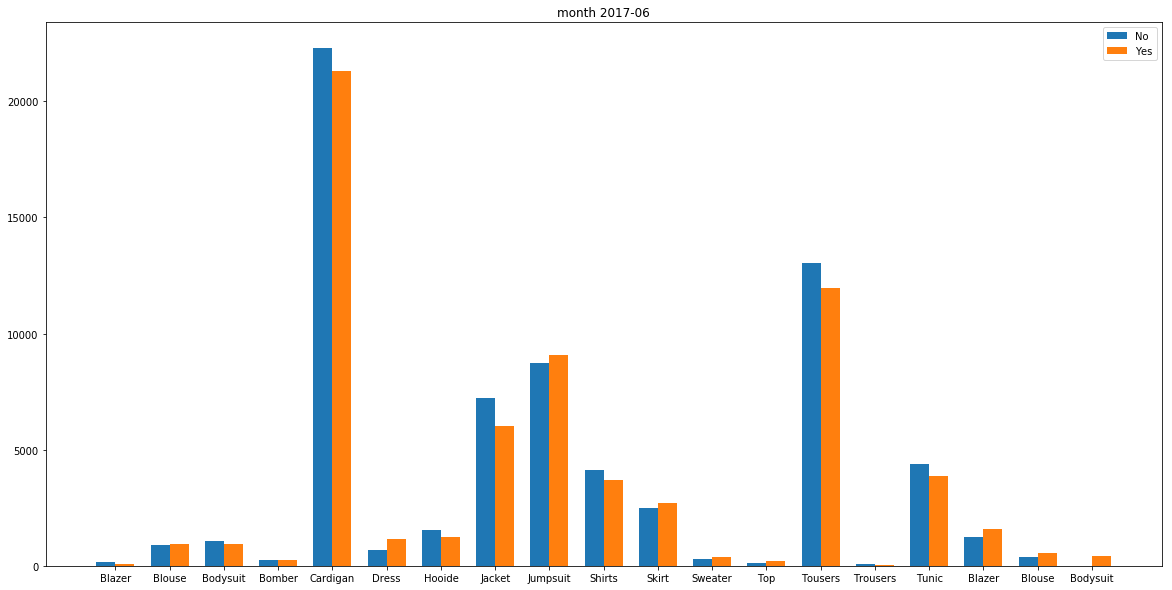

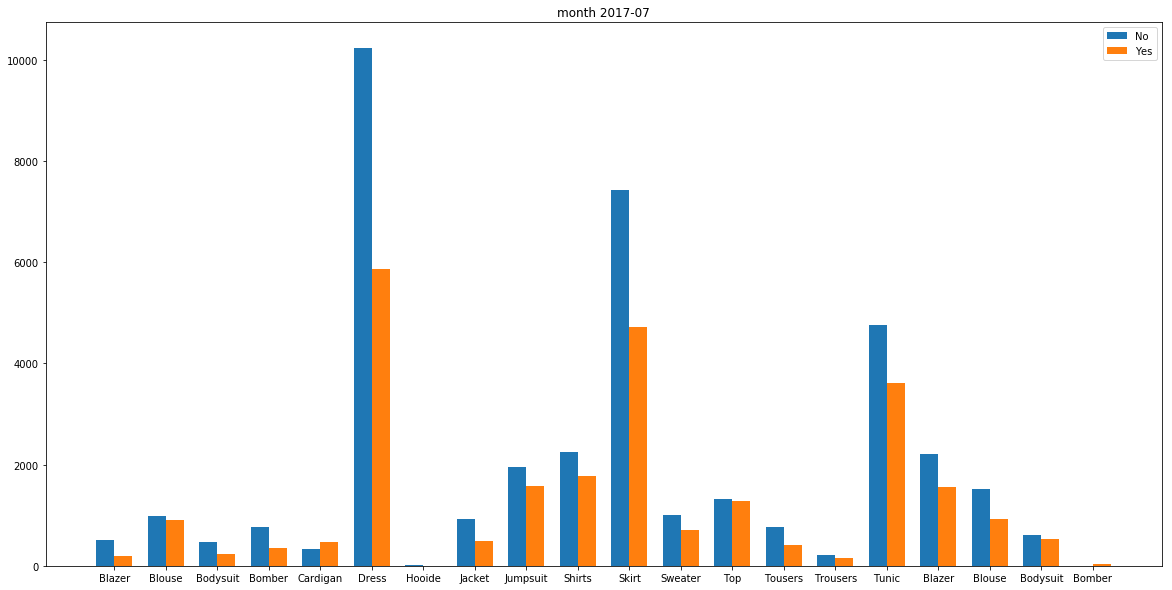

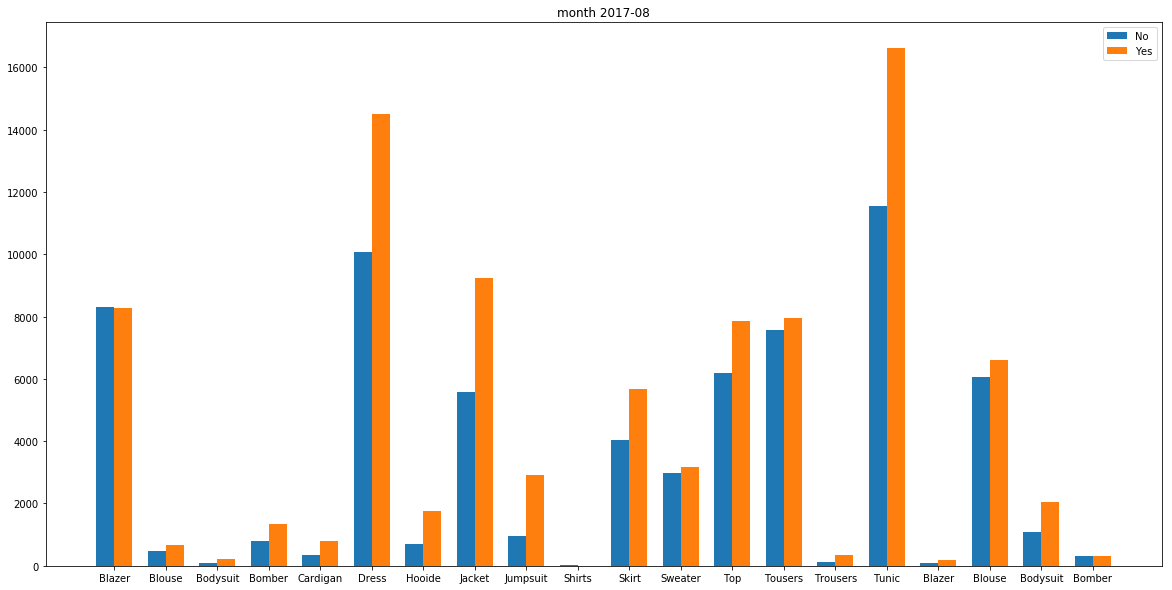

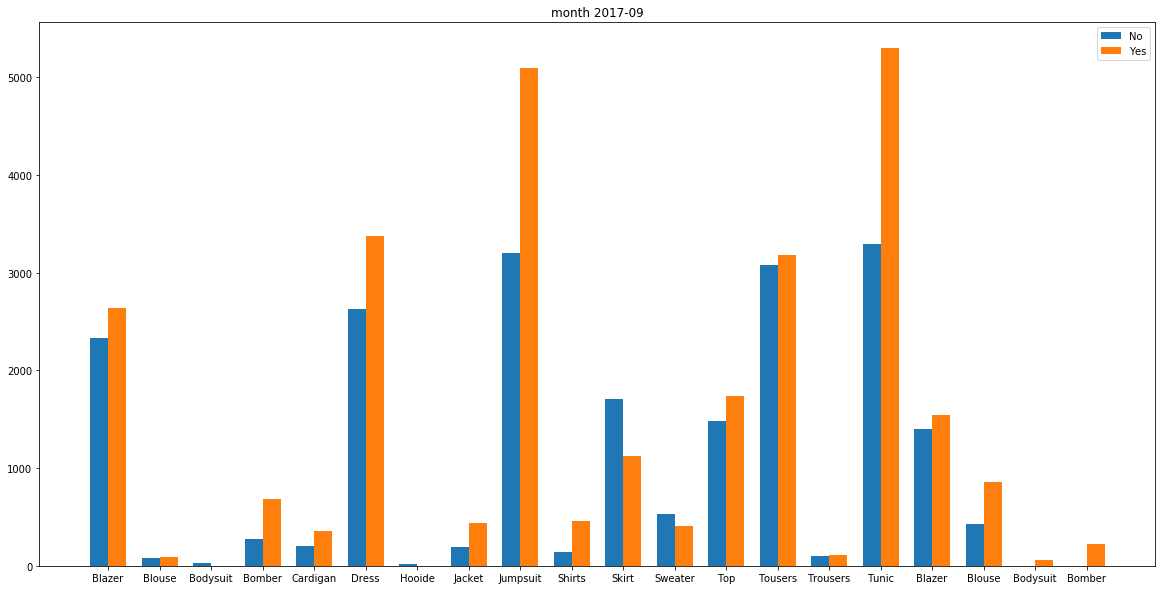

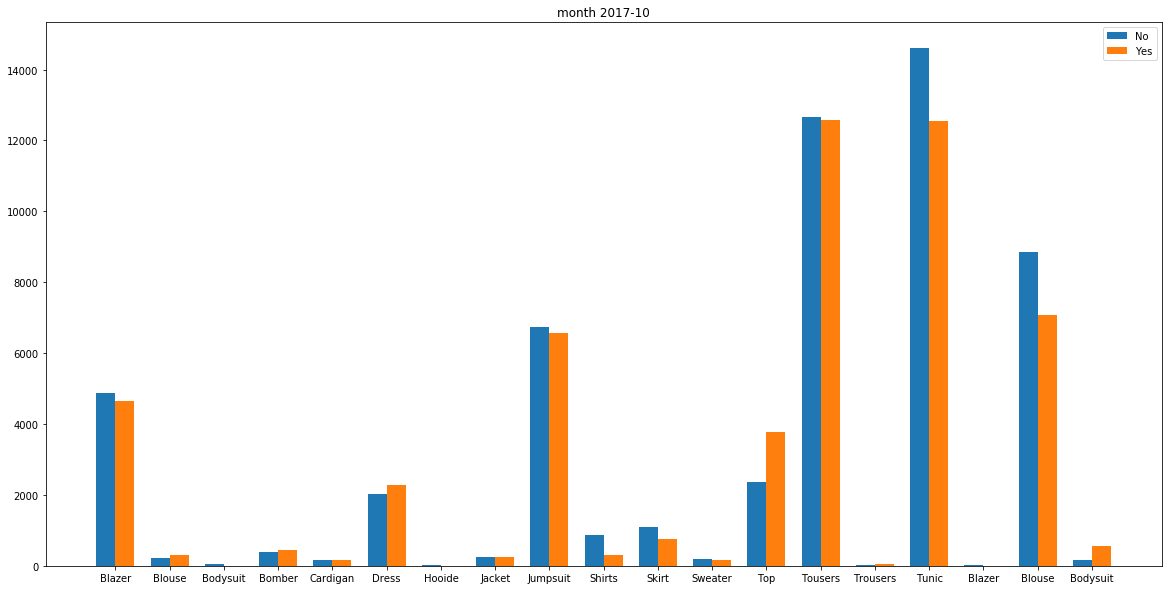

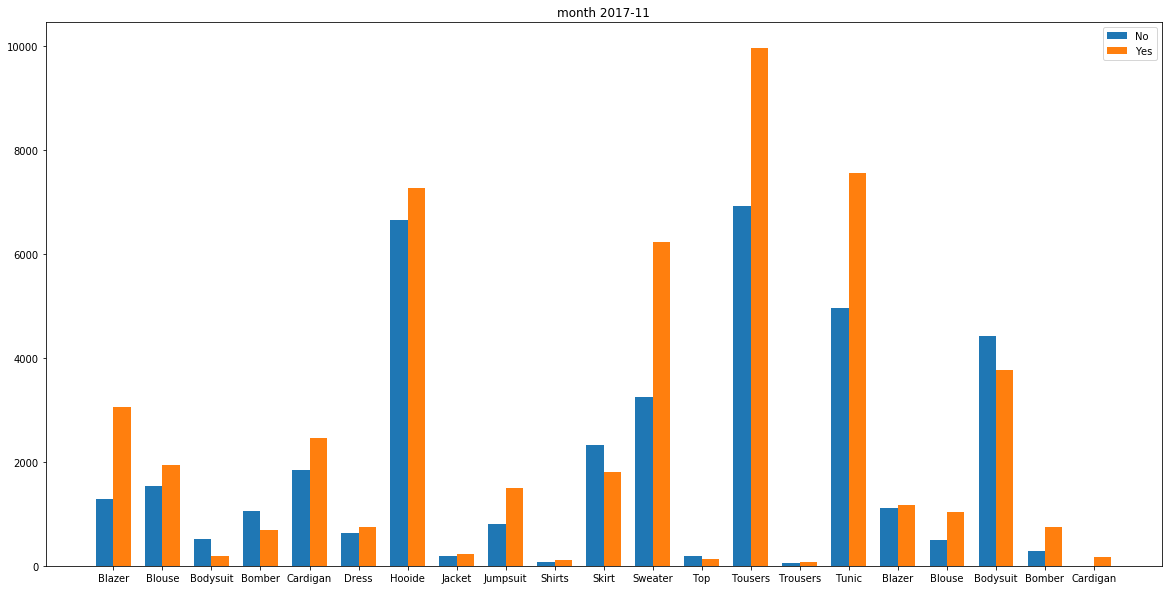

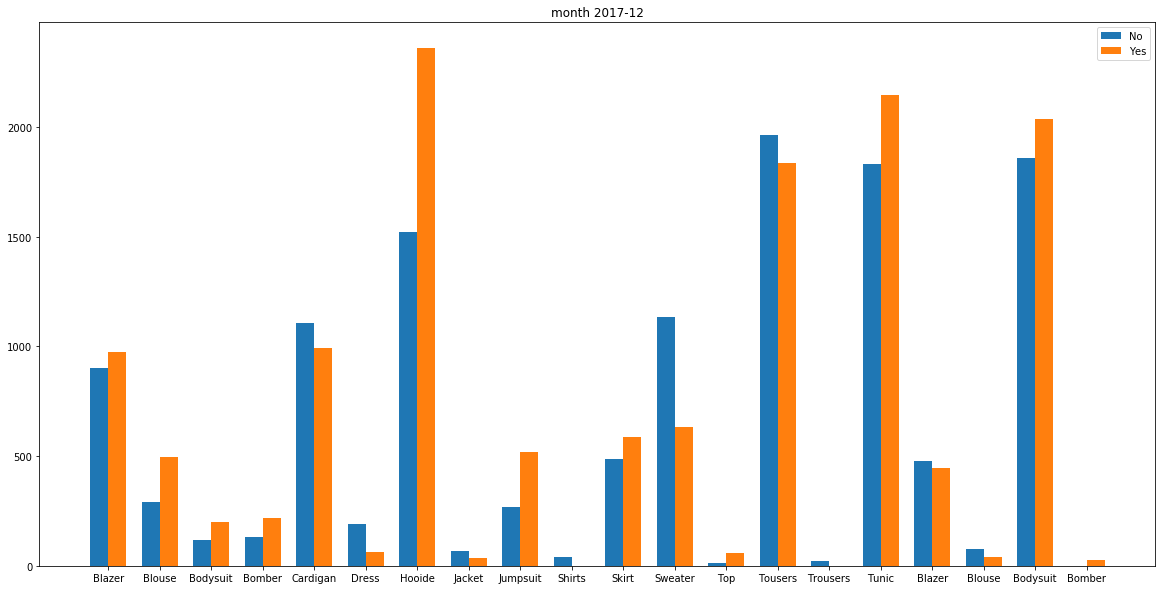

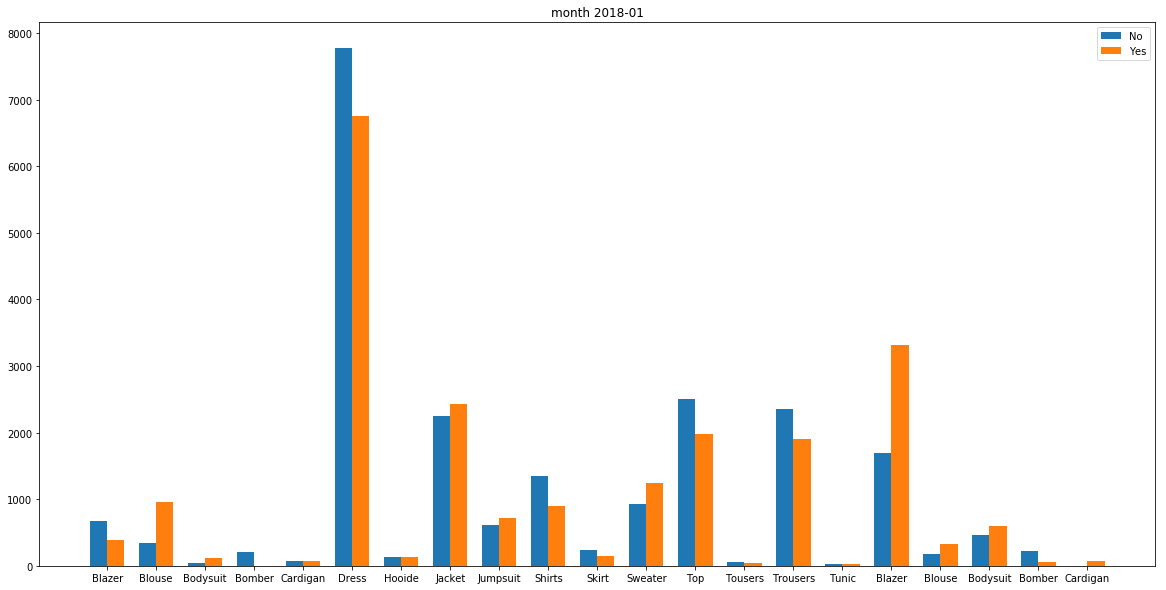

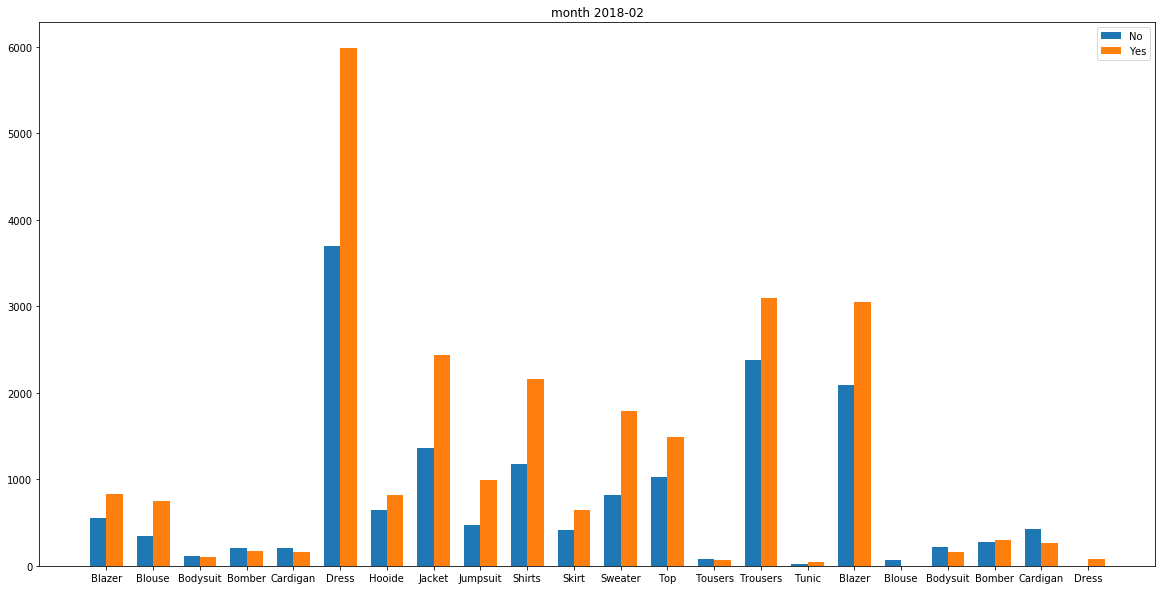

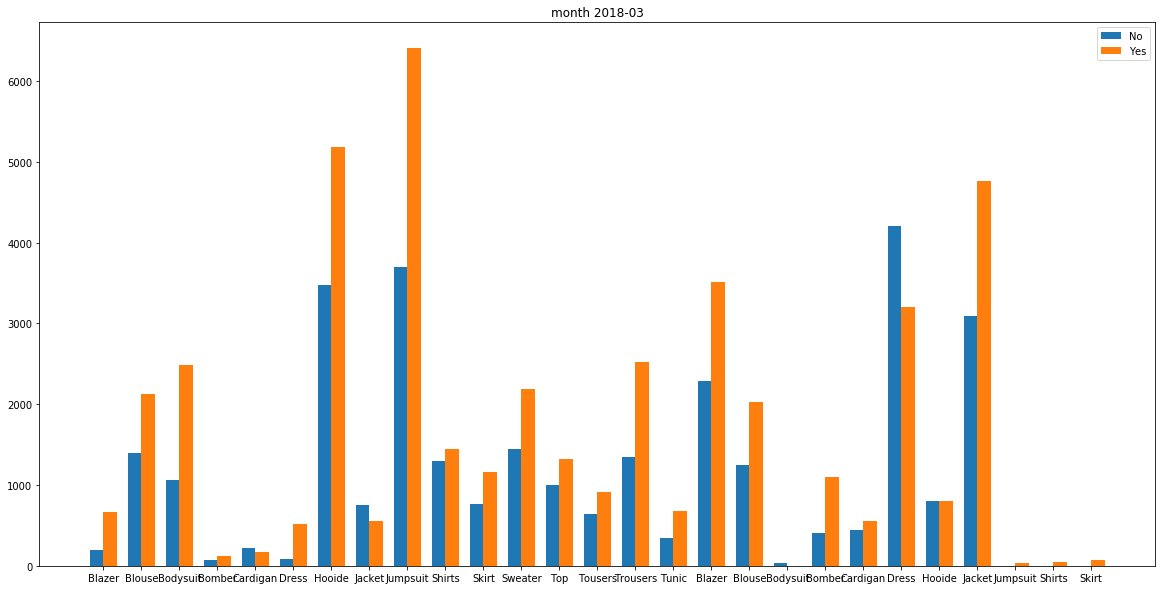

In [241]:
##create plot for every month to check if discount promote sales 
for i in pd.unique(df['month_year']):
    x=np.arange(len(df['No'][df['month_year']==i]))
    width = 0.35 

    fig, ax = plt.subplots(figsize=(20,10))
    rects1 = ax.bar(x - width/2,df['No'][df['month_year']==i] , width, label='No')
    rects2 = ax.bar(x + width/2, df['YES'][df['month_year']==i], width, label='Yes')
    ax.set_xticks(x)
    ax.set_xticklabels(df['product_type'])
    ax.set_title('month {}'.format(i))
    ax.legend()

In [242]:
## it seems like discount promote in some months, but need more information to decide whether discount is working

In [273]:
##RFM analysis
## cerate Recency, Frequency and Monetary based on "Created_at","id",and "total_line_items_price"
present=dt.datetime.today()
rfm=orders.groupby('customer_id').agg({'created_at': lambda date:(present-date.max()).days,
                                      'id': lambda num:len(num),
                                     'total_line_items_price':lambda price: price.sum()})

In [274]:
rfm.columns=['recency','frequency','monetary']

In [275]:
rfm.head(20)

,recency,frequency,monetary
customer_id,,,
8683754719,1137,10,950.0
8686224991,1195,10,1394.0
8686913503,1073,3,115.0
8686915935,1357,1,120.0
8686924319,1357,1,77.0
8687041311,1357,1,68.0
8687102111,1074,1,160.0
8687175327,1122,2,173.0
8687301023,949,3,251.0


In [281]:
rfm=rfm.reset_index()

In [282]:
rfm.head(20)

,customer_id,recency,frequency,monetary
0,8683754719,1137,10,950.0
1,8686224991,1195,10,1394.0
2,8686913503,1073,3,115.0
3,8686915935,1357,1,120.0
4,8686924319,1357,1,77.0
5,8687041311,1357,1,68.0
6,8687102111,1074,1,160.0
7,8687175327,1122,2,173.0
8,8687301023,949,3,251.0
9,8687317279,1357,1,80.0


In [260]:
## create bins for r,f,m 
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'],duplicates='drop')
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])


ValueError: Bin labels must be one fewer than the number of bin edges

In [283]:
##find problem when create bins for frequency column, find out what happens here
rfm['frequency'].describe()

count    14935.000000
mean         1.430064
std          3.116018
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        355.000000
Name: frequency, dtype: float64

In [284]:
## exclude the outlier
rfm=rfm[~rfm['customer_id'].isin([280479208957])]

In [288]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 1, ['1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [289]:
## can't create f_quartile, keep it to one
rfm

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,8683754719,1137,10,950.00,3,1,1
1,8686224991,1195,10,1394.00,3,1,1
2,8686913503,1073,3,115.00,2,1,1
3,8686915935,1357,1,120.00,4,1,1
4,8686924319,1357,1,77.00,4,1,2
5,8687041311,1357,1,68.00,4,1,2
6,8687102111,1074,1,160.00,2,1,1
7,8687175327,1122,2,173.00,3,1,1
8,8687301023,949,3,251.00,1,1,1
9,8687317279,1357,1,80.00,4,1,2


In [290]:
##create rfm score column
rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
0,8683754719,1137,10,950.0,3,1,1,311
1,8686224991,1195,10,1394.0,3,1,1,311
2,8686913503,1073,3,115.0,2,1,1,211
3,8686915935,1357,1,120.0,4,1,1,411
4,8686924319,1357,1,77.0,4,1,2,412


In [292]:
##extract tier 111 customers
rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False)

,customer_id,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
644,8689371999,907,25,5429.00,1,1,1,111
483,8689196063,949,20,4959.00,1,1,1,111
2208,8705718751,830,19,2858.30,1,1,1,111
3822,8849705567,899,17,2607.10,1,1,1,111
1748,8693553375,849,13,2440.60,1,1,1,111
68,8688010527,788,16,2429.60,1,1,1,111
7990,422834542077,894,10,2321.98,1,1,1,111
12379,659535894013,780,7,1966.40,1,1,1,111
3660,8839827999,906,9,1916.00,1,1,1,111
7561,413798176253,788,27,1855.80,1,1,1,111
